In [86]:
import os

In [87]:
#to check if the dataset is present in the current directory
os.listdir()

['.ipynb_checkpoints', 'Titanic .ipynb', 'titanic.csv']

In [88]:
#importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")   # ignore if any warnings are there

In [89]:
# loading the dataset
data = pd.read_csv("titanic.csv")

In [90]:
df = pd.DataFrame(data)

In [91]:
#first five rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
#getting the basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Univariate analysis

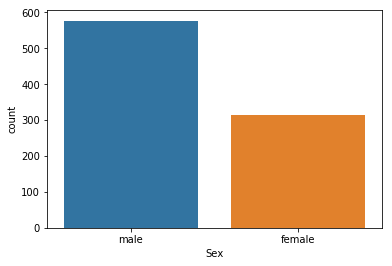

In [93]:
sbn.countplot(df.Sex)

we can infer that most of the passengers were male 

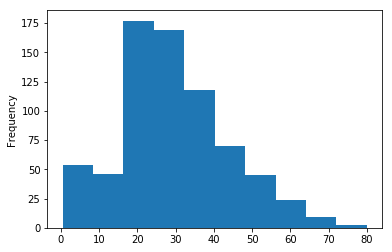

In [94]:
df.Age.plot.hist()

we can infer that most of the passenger fall in the age group between 20 to 45

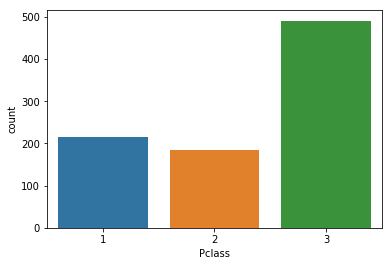

In [95]:
sbn.countplot(df.Pclass)

most of the passengers belongs to class 3

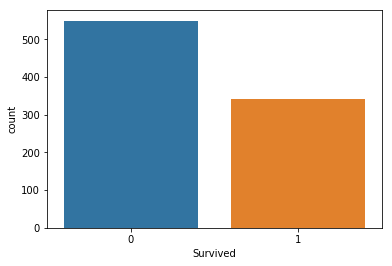

In [96]:
sbn.countplot(df.Survived)

we can infer that the number of passengers survived are less than the passengers died

# Multivariate analysis

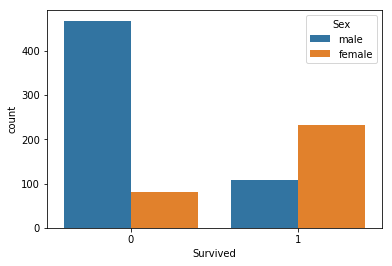

In [97]:
sbn.countplot(df.Survived,hue = df.Sex)

we can infer that death ratio of male is more than the female..this can because there were more male passengers than female

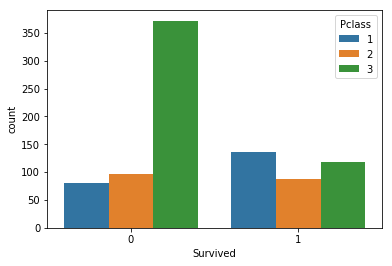

In [98]:
sbn.countplot(df.Survived, hue = df.Pclass)

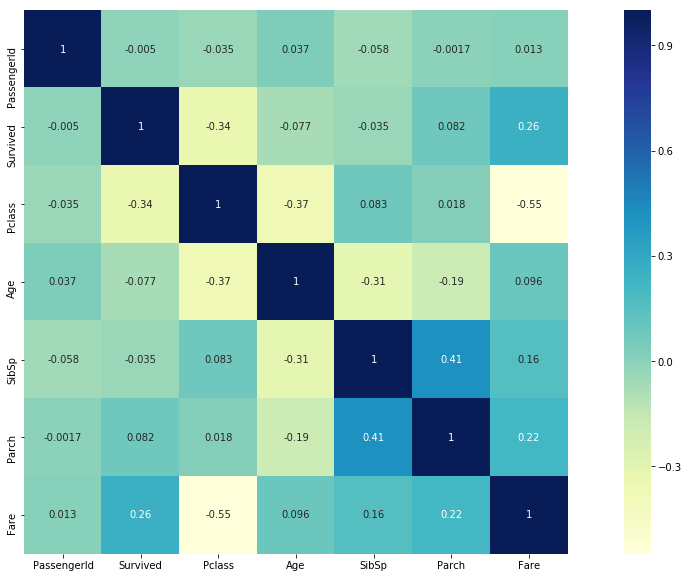

In [99]:
#checking the correlation
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sbn.heatmap(df.corr(),annot=True,square=True,cmap="YlGnBu")

# Data Wrangling

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [101]:
#check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we can drop the cabin column beacause out of 889 rows 687 values are missing..
we will replace the missing value of the Age by its mean

In [102]:
df.drop('Cabin',axis=1,inplace=True)

In [103]:
df.Age=df.Age.fillna(df.Age.mean())

In [104]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [105]:
#dropping the unnecssary column from the dataset
df.drop(['PassengerId','Ticket','Name','Parch'],axis=1,inplace=True)

In [106]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,22.0,1,7.2500,S
1,1,1,female,38.0,1,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,1,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [107]:
df = pd.get_dummies(df)

In [108]:
df.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,7.2500,0,1,0,0,1
1,1,1,38.0,1,71.2833,1,0,1,0,0
2,1,3,26.0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,53.1000,1,0,0,0,1
4,0,3,35.0,0,8.0500,0,1,0,0,1


# Training Model

In [109]:
x=df.drop('Survived',axis=1)
y=df.Survived

In [110]:
#spiltting the dataset into train and test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=101)

In [112]:
model = LogisticRegression()

In [113]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
#predecting the value of y_pred
y_pred = model.predict(x_test)

In [115]:
#checking the accuracy score
accuracy_score(y_pred,y_test)

0.7713004484304933

In [116]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       142
           1       0.66      0.78      0.71        81

   micro avg       0.77      0.77      0.77       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.78      0.77      0.77       223



In [117]:
confusion_matrix(y_pred,y_test)

array([[109,  33],
       [ 18,  63]], dtype=int64)